In [1]:
import os

In [2]:
import requests

In [3]:
up_name = '纳豆奶奶'
up_id = '6574487'

# 探索-视频列表

In [4]:
page = 1

In [5]:
base_api = "https://api.bilibili.com/x/space/arc/search?mid=%s&ps=30&tid=0&pn=%s&keyword=&order=pubdate&jsonp=jsonp"%(up_id,page)

In [6]:
headers = {"accept":"application/json, text/plain, */*",
            "accept-encoding":"gzip, deflate, br",
            "accept-language":"zh-CN,zh;q=0.9",
            "origin":"https://space.bilibili.com",
            "referer":"https://space.bilibili.com/6574487/video",
            "sec-fetch-dest":"empty",
            "sec-fetch-mode":"cors",
            "sec-fetch-site":"same-site",
            "user-agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/81.0.4044.122 Safari/537.36",
          }

In [7]:
page_data = requests.get(base_api,headers=headers)

In [8]:
page_data.json()["data"]["list"]["vlist"][0]

{'comment': 3191,
 'typeid': 21,
 'play': 685434,
 'pic': '//i2.hdslb.com/bfs/archive/bf3e73e16506ff2b10328c67968f67af3c63942c.jpg',
 'subtitle': '',
 'description': '其实一百元还可以做一件非常有意义的事情\n答案在结尾~\n❤❤豆奶日语学习公众号：豆日语\\(^o^)/~❤❤\n碎片时间轻松学日语~~\n→av41491192 片尾曲 日语版改革春风吹满地\n→av40409086 日本妹子为什么这么瘦\n→av42806782 日本妹子为啥冬天光腿\n→av43240232 日本妹子吃超难吃中国菜的反应',
 'copyright': '',
 'title': '100人民币在日本能买啥？大包小包拎回家女子打开后傻眼了。。。',
 'review': 0,
 'author': '纳豆奶奶',
 'mid': 6574487,
 'created': 1605080890,
 'length': '11:03',
 'video_review': 7630,
 'aid': 755162337,
 'bvid': 'BV1Yr4y1w7CK',
 'hide_click': False,
 'is_pay': 0,
 'is_union_video': 0,
 'is_steins_gate': 0}

# 抓取-视频列表

In [9]:
import pandas as pd

In [10]:
pd.options.display.max_columns = None

In [11]:
a = {1:"a",2:"b"}
b = {1:"a",2:"c"}

In [12]:
pd.DataFrame(data=[a,b])

,1,2
0,a,b
1,a,c


In [13]:
data = []

In [14]:
page = 1
while True:
    base_api = "https://api.bilibili.com/x/space/arc/search?mid=%s&ps=30&tid=0&pn=%s&keyword=&order=pubdate&jsonp=jsonp"%(up_id,page)
    page_data = requests.get(base_api,headers=headers)
    video_data = page_data.json()["data"]["list"]["vlist"]
    if not video_data:
        break
    data += page_data.json()["data"]["list"]["vlist"]
    page += 1

In [15]:
videos = pd.DataFrame(data)

In [16]:
videos

,comment,typeid,play,pic,subtitle,description,copyright,title,review,author,mid,created,length,video_review,aid,bvid,hide_click,is_pay,is_union_video,is_steins_gate
0,3191,21,685434,//i2.hdslb.com/bfs/archive/bf3e73e16506ff2b103...,,其实一百元还可以做一件非常有意义的事情\n答案在结尾~\n❤❤豆奶日语学习公众号：豆日语\(...,,100人民币在日本能买啥？大包小包拎回家女子打开后傻眼了。。。,0,纳豆奶奶,6574487,1605080890,11:03,7630,755162337,BV1Yr4y1w7CK,False,0,0,0
1,4951,213,1284293,//i2.hdslb.com/bfs/archive/1219ed02da5d6ac046a...,,200日元vs20000日元你选哪个？\n说给你们的一点体己话，在结尾~\n❤❤豆奶日语学习...,,200日元Vs20000日元盒饭开箱！普通群众和日本大佬吃的有啥区别？,0,纳豆奶奶,6574487,1603425620,11:43,11884,287562706,BV1Ff4y1z7rx,False,0,0,0
2,5156,138,1662239,//i2.hdslb.com/bfs/archive/65ed7ffccef53311af7...,,小陈 so sexy and I know it 眨眼眨眼\n❤豆奶日语学习公众号：豆日语...,,日本妹子打喷嚏被二十万人点赞，女子模仿后网友直呼太。。。,0,纳豆奶奶,6574487,1602745955,08:15,20628,584908702,BV12z4y1d7XX,False,0,0,0
3,8303,21,1384791,//i0.hdslb.com/bfs/archive/e72b0c42b7ee9cd5273...,,这次我花了半个月时间去敲拍摄，辗转京都拍了两家百年老店。\n也从这些真正的匠人身上也学到一点...,,为什么日本那么多匠人？十六代目店主继承550年老铺的原因竟然是......,0,纳豆奶奶,6574487,1602221682,12:34,8804,627429635,BV1yt4y1v7Qs,False,0,0,0
4,8662,21,1464196,//i2.hdslb.com/bfs/archive/928185bc813f70ffaaf...,,这次跟拍的日本小哥竟然跟网上查到的资料好吻合！\n部分不代表全部~不是啥严肃科普啊，我也不是...,,为什么日本人月入2万却没存款？跟拍日本上班族的一天，据说这样结不了婚。。。,0,纳豆奶奶,6574487,1601697603,12:15,14404,287340037,BV1Xf4y1q7VS,False,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,679,157,373238,//i1.hdslb.com/bfs/archive/eed9c12b2251ea41669...,,分享了自己的经验和最近一直在梳的发型，希望各位方脸妹子更自信，方脸也是很美的~~\n如果不是...,,【发型教程】大脸必须知道的发型，手残福音，拯救方脸！,0,纳豆奶奶,6574487,1491465239,11:35,2578,9648737,BV1Qx411Q72Y,False,0,0,0
173,2057,157,331656,//i0.hdslb.com/bfs/archive/42154eddfcdb63fa0ac...,,第一次发美妆区，请多多包涵♪(づ￣3￣)づ╭❤～\n嗯，怕疼的憋看。。。\n牌子+safet...,,【自己打耳洞教程】估计看完这个视频也没人敢自己打了。。。,0,纳豆奶奶,6574487,1488815029,09:00,4101,9011835,BV15x411C7oE,False,0,0,0
174,423,213,224361,//i1.hdslb.com/bfs/archive/edac3401847b09956d8...,,已加入豪华黑名单\n 对不起这碗蓝色拖把我真的吃不下去 \n 还不快去微博@纳豆少女 安慰...,,活死人拉面！蓝色食物究竟有多恶心？,0,纳豆奶奶,6574487,1484213820,03:38,1477,7972646,BV1xs411h7cL,False,0,0,0
175,589,21,274272,//i1.hdslb.com/bfs/archive/606acdae5e84ec97e47...,,各位久等了~ 如果喜欢 请给我爱╮(╯▽╰)╭ 微博：@纳豆少女,,狂搅纳豆四千次 你以为。。。,0,纳豆奶奶,6574487,1467198416,04:06,1679,5137862,BV1as411v74V,False,0,0,0


# 探索-视频详情

In [17]:
aid = 4052652

In [18]:
api_url = "https://api.bilibili.com/x/web-interface/archive/stat?aid=%s"%aid

In [19]:
def str_to_dict(x):
    return eval('{"' + x.replace(": ",'":"').replace('\n','","') + '"}')

In [20]:
header_raw ="""accept: */*
accept-encoding: gzip, deflate, br
accept-language: zh-CN,zh;q=0.9
origin: https://www.bilibili.com
referer: https://www.bilibili.com/video/BV1ts411Q7k7
sec-fetch-dest: empty
sec-fetch-mode: cors
sec-fetch-site: same-site
user-agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/81.0.4044.122 Safari/537.36"""

In [21]:
headers = str_to_dict(header_raw)

In [22]:
headers

{'accept': '*/*',
 'accept-encoding': 'gzip, deflate, br',
 'accept-language': 'zh-CN,zh;q=0.9',
 'origin': 'https://www.bilibili.com',
 'referer': 'https://www.bilibili.com/video/BV1ts411Q7k7',
 'sec-fetch-dest': 'empty',
 'sec-fetch-mode': 'cors',
 'sec-fetch-site': 'same-site',
 'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/81.0.4044.122 Safari/537.36'}

In [23]:
api_url = "https://api.bilibili.com/x/web-interface/archive/stat?aid=%s"%aid
video_url_response = requests.get(api_url,headers=headers)

In [24]:
video_url_response.json()["data"]

{'aid': 4052652,
 'bvid': 'BV1ts411Q7k7',
 'view': 330658,
 'danmaku': 3625,
 'reply': 1724,
 'favorite': 898,
 'coin': 1863,
 'share': 107,
 'like': 10060,
 'now_rank': 0,
 'his_rank': 0,
 'no_reprint': 0,
 'copyright': 1,
 'argue_msg': '',
 'evaluation': ''}

# 抓取-视频详情

In [25]:
import time

In [26]:
data_video = []

In [27]:
for aid in videos["aid"]:
    api_url = "https://api.bilibili.com/x/web-interface/archive/stat?aid=%s"%aid
    video_url_response = requests.get(api_url,headers=headers)
    data_video.append(video_url_response.json()["data"])
    time.sleep(1)

In [28]:
video_details = pd.DataFrame(data_video)

# 拼接-结果数据

In [29]:
videos.columns

Index(['comment', 'typeid', 'play', 'pic', 'subtitle', 'description',
       'copyright', 'title', 'review', 'author', 'mid', 'created', 'length',
       'video_review', 'aid', 'bvid', 'hide_click', 'is_pay', 'is_union_video',
       'is_steins_gate'],
      dtype='object')

In [30]:
video_details.columns

Index(['aid', 'bvid', 'view', 'danmaku', 'reply', 'favorite', 'coin', 'share',
       'like', 'now_rank', 'his_rank', 'no_reprint', 'copyright', 'argue_msg',
       'evaluation'],
      dtype='object')

In [31]:
set(videos.columns) & set(video_details.columns)

{'aid', 'bvid', 'copyright'}

In [32]:
results = videos.merge(video_details.drop(columns="copyright"),how="left",on=["aid","bvid"])

In [49]:
results.to_excel("results.xlsx")

# 账号基础信息

In [235]:
import datetime 

In [260]:
results["create_time_fmt"] = results.created.apply(lambda x: datetime.datetime.fromtimestamp(x))

In [261]:
results["create_year"] = results["create_time_fmt"].apply(lambda x: x.year)
results["create_month"] = results["create_time_fmt"].apply(lambda x: x.month)
results["create_day"] = results["create_time_fmt"].apply(lambda x: x.day)
results["create_weekday"] = results["create_time_fmt"].apply(lambda x: x.weekday() + 1)

In [269]:
pd.crosstab(results.create_year,results.create_month)

create_month,1,2,3,4,5,6,7,8,9,10,11,12
create_year,,,,,,,,,,,,
2016,0,0,1,0,0,1,0,0,0,0,0,0
2017,1,0,1,3,4,2,2,4,1,1,1,3
2018,4,6,4,2,0,2,3,3,2,3,3,2
2019,4,7,7,8,4,9,6,4,7,9,5,4
2020,4,4,6,5,6,4,6,3,1,4,1,0


In [267]:
results.create_year.value_counts(normalize=True)

2019    0.418079
2020    0.248588
2018    0.192090
2017    0.129944
2016    0.011299
Name: create_year, dtype: float64

In [266]:
results.create_month.value_counts(normalize=True)

3     0.107345
6     0.101695
4     0.101695
10    0.096045
7     0.096045
2     0.096045
8     0.079096
5     0.079096
1     0.073446
9     0.062147
11    0.056497
12    0.050847
Name: create_month, dtype: float64

In [264]:
results.create_weekday.value_counts(normalize=True)

4    0.203390
3    0.163842
6    0.158192
5    0.135593
1    0.129944
7    0.124294
2    0.084746
Name: create_weekday, dtype: float64

In [273]:
pd.crosstab(results.create_year,results.create_weekday,normalize=False,margins=True)

create_weekday,1,2,3,4,5,6,7,All
create_year,,,,,,,,
2016,0,0,2,0,0,0,0,2
2017,5,2,5,5,1,4,1,23
2018,3,0,6,9,6,4,6,34
2019,11,9,10,11,12,14,7,74
2020,4,4,6,11,5,6,8,44
All,23,15,29,36,24,28,22,177


# 热度特征与发表次序的基本关系

In [274]:
results_2 = results.sort_values("created")

In [275]:
results_2

,comment,typeid,play,pic,subtitle,description,copyright,title,review,author,mid,created,length,video_review,aid,bvid,hide_click,is_pay,is_union_video,is_steins_gate,view,danmaku,reply,favorite,coin,share,like,now_rank,his_rank,no_reprint,argue_msg,evaluation,create_time_fmt,create_year,create_month,create_day,create_weekday
176,1724,138,330650,//i0.hdslb.com/bfs/archive/e6cc83400c803a765fd...,,自制 风靡日本的水果麦片卡乐比，吃上就停不下来啦，很多朋友都说最喜欢里面的水果，那么正直善良...,,卡乐比麦片里究竟有多少水果 无聊girl的实验,0,纳豆奶奶,6574487,1457505191,02:34,3625,4052652,BV1ts411Q7k7,False,0,0,0,330658,3625,1724,898,1863,107,10060,0,0,0,,,2016-03-09 14:33:11,2016,3,9,3
175,589,21,274272,//i1.hdslb.com/bfs/archive/606acdae5e84ec97e47...,,各位久等了~ 如果喜欢 请给我爱╮(╯▽╰)╭ 微博：@纳豆少女,,狂搅纳豆四千次 你以为。。。,0,纳豆奶奶,6574487,1467198416,04:06,1679,5137862,BV1as411v74V,False,0,0,0,274296,1679,589,845,3050,137,7178,0,0,0,,,2016-06-29 19:06:56,2016,6,29,3
174,423,213,224361,//i1.hdslb.com/bfs/archive/edac3401847b09956d8...,,已加入豪华黑名单\n 对不起这碗蓝色拖把我真的吃不下去 \n 还不快去微博@纳豆少女 安慰...,,活死人拉面！蓝色食物究竟有多恶心？,0,纳豆奶奶,6574487,1484213820,03:38,1477,7972646,BV1xs411h7cL,False,0,0,0,224362,1477,423,533,908,235,2846,0,0,0,,,2017-01-12 17:37:00,2017,1,12,4
173,2057,157,331656,//i0.hdslb.com/bfs/archive/42154eddfcdb63fa0ac...,,第一次发美妆区，请多多包涵♪(づ￣3￣)づ╭❤～\n嗯，怕疼的憋看。。。\n牌子+safet...,,【自己打耳洞教程】估计看完这个视频也没人敢自己打了。。。,0,纳豆奶奶,6574487,1488815029,09:00,4101,9011835,BV15x411C7oE,False,0,0,0,331662,4101,2057,2123,7699,1493,5993,0,0,0,,,2017-03-06 23:43:49,2017,3,6,1
172,679,157,373238,//i1.hdslb.com/bfs/archive/eed9c12b2251ea41669...,,分享了自己的经验和最近一直在梳的发型，希望各位方脸妹子更自信，方脸也是很美的~~\n如果不是...,,【发型教程】大脸必须知道的发型，手残福音，拯救方脸！,0,纳豆奶奶,6574487,1491465239,11:35,2578,9648737,BV1Qx411Q72Y,False,0,0,0,373242,2578,679,6115,3391,675,4003,0,0,0,,,2017-04-06 15:53:59,2017,4,6,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,8662,21,1464196,//i2.hdslb.com/bfs/archive/928185bc813f70ffaaf...,,这次跟拍的日本小哥竟然跟网上查到的资料好吻合！\n部分不代表全部~不是啥严肃科普啊，我也不是...,,为什么日本人月入2万却没存款？跟拍日本上班族的一天，据说这样结不了婚。。。,0,纳豆奶奶,6574487,1601697603,12:15,14404,287340037,BV1Xf4y1q7VS,False,0,0,0,1464266,14404,8662,13084,51588,2828,147399,0,36,1,,,2020-10-03 12:00:03,2020,10,3,6
3,8303,21,1384791,//i0.hdslb.com/bfs/archive/e72b0c42b7ee9cd5273...,,这次我花了半个月时间去敲拍摄，辗转京都拍了两家百年老店。\n也从这些真正的匠人身上也学到一点...,,为什么日本那么多匠人？十六代目店主继承550年老铺的原因竟然是......,0,纳豆奶奶,6574487,1602221682,12:34,8804,627429635,BV1yt4y1v7Qs,False,0,0,0,1384868,8804,8303,20041,80655,1719,150615,0,11,1,,,2020-10-09 13:34:42,2020,10,9,5
2,5156,138,1662239,//i2.hdslb.com/bfs/archive/65ed7ffccef53311af7...,,小陈 so sexy and I know it 眨眼眨眼\n❤豆奶日语学习公众号：豆日语...,,日本妹子打喷嚏被二十万人点赞，女子模仿后网友直呼太。。。,0,纳豆奶奶,6574487,1602745955,08:15,20628,584908702,BV12z4y1d7XX,False,0,0,0,1662427,20628,5156,12124,42127,3674,149450,0,26,1,,,2020-10-15 15:12:35,2020,10,15,4
1,4951,213,1284293,//i2.hdslb.com/bfs/archive/1219ed02da5d6ac046a...,,200日元vs20000日元你选哪个？\n说给你们的一点体己话，在结尾~\n❤❤豆奶日语学习...,,200日元Vs20000日元盒饭开箱！普通群众和日本大佬吃的有啥区别？,0,纳豆奶奶,6574487,1603425620,11:43,11884,287562706,BV1Ff4y1z7rx,False,0,0,0,1284791,11885,4951,9334,32646,1742,120448,0,55,1,,,2020-10-23 12:00:20,2020,10,23,5


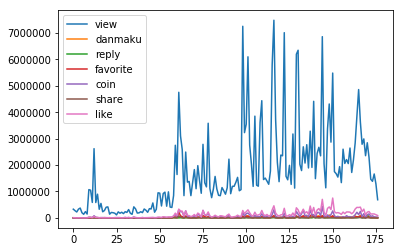

In [276]:
results_2.reset_index(drop=True)[["view","danmaku","reply","favorite","coin","share","like"]].plot()

In [277]:
results_3 = results_2.reset_index(drop=True)
results_3.index += 1

In [278]:
to_plot = results_3[["view","danmaku","reply","favorite","coin","share","like"]]

# 标准化
取最高值为100%

In [279]:
to_plot

,view,danmaku,reply,favorite,coin,share,like
1,330658,3625,1724,898,1863,107,10060
2,274296,1679,589,845,3050,137,7178
3,224362,1477,423,533,908,235,2846
4,331662,4101,2057,2123,7699,1493,5993
5,373242,2578,679,6115,3391,675,4003
...,...,...,...,...,...,...,...
173,1464266,14404,8662,13084,51588,2828,147399
174,1384868,8804,8303,20041,80655,1719,150615
175,1662427,20628,5156,12124,42127,3674,149450
176,1284791,11885,4951,9334,32646,1742,120448


In [280]:
for col in to_plot.columns:
    to_plot[col] = to_plot[col]/to_plot[col].max()

In [281]:
to_plot

,view,danmaku,reply,favorite,coin,share,like
1,0.044214,0.032409,0.015769,0.004144,0.004253,0.001470,0.013382
2,0.036678,0.015011,0.005387,0.003899,0.006963,0.001882,0.009548
3,0.030001,0.013205,0.003869,0.002460,0.002073,0.003229,0.003786
4,0.044348,0.036665,0.018815,0.009797,0.017576,0.020514,0.007972
5,0.049908,0.023048,0.006211,0.028218,0.007741,0.009275,0.005325
...,...,...,...,...,...,...,...
173,0.195795,0.128777,0.079228,0.060376,0.117772,0.038857,0.196073
174,0.185178,0.078711,0.075944,0.092479,0.184130,0.023619,0.200351
175,0.222292,0.184422,0.047160,0.055946,0.096173,0.050482,0.198802
176,0.171797,0.106256,0.045285,0.043072,0.074528,0.023935,0.160223


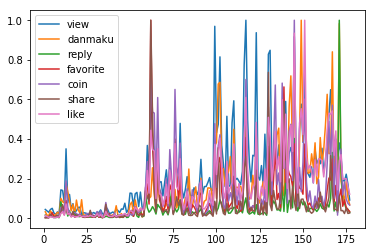

In [282]:
to_plot.plot()

In [283]:
import cufflinks as cf
cf.set_config_file(offline=True)

In [284]:
to_plot.columns

Index(['view', 'danmaku', 'reply', 'favorite', 'coin', 'share', 'like'], dtype='object')

In [285]:
col_maps = {'view':"浏览数",
            'danmaku':"弹幕数",
            'reply':"评论数",
            'favorite':"收藏数",
            'coin':"投币数",
            'share':"分享数",
            'like':"点赞数"}

In [286]:
to_plot.rename(columns=col_maps,inplace=True)

In [287]:
to_plot.iplot(title="热度特征与发表次序的基本关系(标准化)",xTitle="发表次序",yTitle="热度特征",asUrl=True)

'热度特征与发表次序的基本关系(标准化).html'

# 各热度排序及其最高视频

In [288]:
results_4 = results_3.rename(columns=col_maps)

In [289]:
col_maps

{'view': '浏览数',
 'danmaku': '弹幕数',
 'reply': '评论数',
 'favorite': '收藏数',
 'coin': '投币数',
 'share': '分享数',
 'like': '点赞数'}

In [290]:
for col in col_maps.values():
    results_4[col+"_rank"] = results_4[col].rank(ascending=False)

In [291]:
hot_rank = {col:results_4[results_4[col+"_rank"]<=3].sort_values(col+"_rank").title for col in col_maps.values()}

In [292]:
hot_rank

{'浏览数': 117           为什么在红灯区工作的日本女生这么多？每二十个中就有一个在…
 99     实测在日本穿短裙一定会被偷拍？一女子在偷拍高发地竟遇到这种事......
 123    崩溃！骗日本妹子2块一斤的西瓜2000块，故意摔碎让她赔会发生什么...
 Name: title, dtype: object,
 '弹幕数': 149           我在某约会软件上发现了纳豆奶奶？？
 171    一些道歉和一些澄清，纳豆奶奶从未恶意贬低任何人。
 167              我承认，我是全网最丑大饼脸。
 Name: title, dtype: object,
 '评论数': 171    一些道歉和一些澄清，纳豆奶奶从未恶意贬低任何人。
 145               听说纳豆奶奶改了日本国籍？
 167              我承认，我是全网最丑大饼脸。
 Name: title, dtype: object,
 '收藏数': 62      【魔性日语版】改革春风吹满地！一唱日语就立马开车了呢果然
 139      验证！日本秘术3秒解决脖子酸痛？一女子尝试后说....
 117    为什么在红灯区工作的日本女生这么多？每二十个中就有一个在…
 Name: title, dtype: object,
 '投币数': 145                    听说纳豆奶奶改了日本国籍？
 62      【魔性日语版】改革春风吹满地！一唱日语就立马开车了呢果然
 117    为什么在红灯区工作的日本女生这么多？每二十个中就有一个在…
 Name: title, dtype: object,
 '分享数': 62     【魔性日语版】改革春风吹满地！一唱日语就立马开车了呢果然
 130      约见日本第一牛郎！夜王罗兰当前，一女子竟面不改色……
 139     验证！日本秘术3秒解决脖子酸痛？一女子尝试后说....
 Name: title, dtype: object,
 '点赞数': 151         实锤纳豆奶奶？我就不该在b站搜自己.......
 145                    听说纳豆奶奶改了日本国籍？
 117    为什么在红灯区工作的日本女生这么多？每二十

# 绝对值Top归因定性分析

基于这几个热度指标,我们从绝对值来看一下结果(此处存在由于历史粉丝数不同产生的影响):

## 两大开放互动性反馈

**浏览数**

**浏览这个指标比较特殊,在进入视频详情页之前发生,所以决定其热度的较大影响因素为标题和封面.**

* 我们观察到前两个标题其分别含有"红灯区"与"穿短裙"、"偷拍"这种容易让人产生窥视欲的词语.
* 这三个标题均带有明显的UC震惊部风格,"每二十个中就有一个","一女子……竟遇到这种事","崩溃!"
* 其标题均带以省略号结尾,引人好奇.
* 无论有意或是无心,这类型标题从点击浏览的效果来看确实起到了很好的作用.所以,网友们都爱看啥呢?(doge)

**弹幕数与评论数**

**弹幕与评论均是网友针对视频内容进行意见发表的途径,但弹幕更便于与up主当下的视频内容互动和抖梗抖机灵.**

* 我看到两者的头三个视频重叠了两个,重叠部分的主题分别是"道歉"与"自黑"
    * 道歉类的由于容易被议论与声援所以数量较多不做细究;
    * 自黑的视频我重温了一下,其不仅仅在视频前段进行基于自身相貌的自黑来逗笑网友,也在中后段又加入了大量的对于样貌歧视的反击引起很多人的感同身受的吐槽,以及对大家的鼓励,十分正能量获得声援好感.
    * 两者的差集后续有时间再细究

## 四大点击标记性反馈

* 点赞、投币、收藏、分享,从交互的角度来看从左向右其完成交互的难度逐步加深,其在页面上的设计也是遵循被使用的顺序
    * 点赞需要1次点击完成
    * 投币需要2次点击完成,且增加个人账号经验,并且默认可自动完成点赞
    * 收藏需要3次点击完成,并且对个人账号无功利性的意义,仅对个人实际使用存在意义
    * 分享的点击次数根据分享渠道的不同而不同,但是都需要超过3次的点击次数

**点赞数与投币数**

**点赞数与投币数均代表网友对视频内容的肯定,其中投币数对于up主更有实际的意义.**

* 排除掉浏览量最大的《为什么在红灯区工作的日本女生这么多？每二十个中就有一个在…》视频外,《听说纳豆奶奶改了日本国籍？》这个视频在点赞和投币上均取得了较高的数量,这是个少有的正经的视频,UP主不仅在其中澄清了误会,也在视频里正式分享了下自己的工作和理想,所以得到了较多的支持."念念不忘,必有回响."希望UP主实现自己的目标.

**收藏数与分享树**

**收藏数与分享数高意味着一个视频值得后续方便查找,或充满硬核知识点具有实用价值或足够精彩等.**

* 两者交集
    * 鬼畜洗脑向的《【魔性日语版】改革春风吹满地！一唱日语就立马开车了呢果然》真的很鬼畜和洗脑...
    * 生活技巧教学向的《验证！日本秘术3秒解决脖子酸痛？一女子尝试后说....》这个我试过效果还不错,当时也分享给了朋友.教学向的视频总是要马了就是会了马了就是做了的嘛!

# 各热度转化率及其最高视频——基于浏览数

In [293]:
for col in set(top_videos.keys()) - set(["浏览数"]):
    results_4[col+"_conversion_rate"] = results_4[col]/results_4["浏览数"]

In [294]:
for col in set(top_videos.keys()) - set(["浏览数"]):
    results_4[col+"_conversion_rate_rank"] = results_4[col+"_conversion_rate"].rank(ascending=False)

In [295]:
conversion_rate_rank = {col:results_4[results_4[col+"_conversion_rate_rank"]<=3].sort_values(col+"_rank").title for col in set(top_videos.keys()) - set(["浏览数"])}

In [296]:
conversion_rate_rank

{'投币数': 134                为什么纳豆奶奶在几个月内从少女变成了奶奶？
 76     中国姑娘和日本妹子在日本东京街头做了一件从没人做过的事......
 66        日本妹子太在意别人？吃下这么难吃的东西竟说出这种话.....
 Name: title, dtype: object,
 '点赞数': 151    实锤纳豆奶奶？我就不该在b站搜自己.......
 138                 我拒绝了两百万口罩生意
 152        为什么日本这么多女装大佬？是因为变态吗…
 Name: title, dtype: object,
 '弹幕数': 171           一些道歉和一些澄清，纳豆奶奶从未恶意贬低任何人。
 22               追星是一种怎样的体验？ 生来本弱，追星则刚
 19     中国小学生vs日本小学生，你还记得当年做广播体操旁边站着谁吗？
 Name: title, dtype: object,
 '评论数': 171       一些道歉和一些澄清，纳豆奶奶从未恶意贬低任何人。
 59          我们为什么要选择自杀？致跟我有相同遭遇的你们
 18     会有歪果仁为四川地震捐款吗？？日本正太萌化我(>_<)
 Name: title, dtype: object,
 '收藏数': 62     【魔性日语版】改革春风吹满地！一唱日语就立马开车了呢果然
 139     验证！日本秘术3秒解决脖子酸痛？一女子尝试后说....
 59           我们为什么要选择自杀？致跟我有相同遭遇的你们
 Name: title, dtype: object,
 '分享数': 62     【魔性日语版】改革春风吹满地！一唱日语就立马开车了呢果然
 139     验证！日本秘术3秒解决脖子酸痛？一女子尝试后说....
 27     九国口音模仿各国渣男搭讪，一个视频看穿全世界野男人的套路
 Name: title, dtype: object}

# 相对值Top归因定性分析
TODO

# 爆红视频分析

In [297]:
results_4

,comment,typeid,play,pic,subtitle,description,copyright,title,review,author,mid,created,length,video_review,aid,bvid,hide_click,is_pay,is_union_video,is_steins_gate,浏览数,弹幕数,评论数,收藏数,投币数,分享数,点赞数,now_rank,his_rank,no_reprint,argue_msg,evaluation,create_time_fmt,create_year,create_month,create_day,create_weekday,浏览数_rank,弹幕数_rank,评论数_rank,收藏数_rank,投币数_rank,分享数_rank,点赞数_rank,投币数_conversion_rate,点赞数_conversion_rate,弹幕数_conversion_rate,评论数_conversion_rate,收藏数_conversion_rate,分享数_conversion_rate,投币数_conversion_rate_rank,点赞数_conversion_rate_rank,弹幕数_conversion_rate_rank,评论数_conversion_rate_rank,收藏数_conversion_rate_rank,分享数_conversion_rate_rank
1,1724,138,330650,//i0.hdslb.com/bfs/archive/e6cc83400c803a765fd...,,自制 风靡日本的水果麦片卡乐比，吃上就停不下来啦，很多朋友都说最喜欢里面的水果，那么正直善良...,,卡乐比麦片里究竟有多少水果 无聊girl的实验,0,纳豆奶奶,6574487,1457505191,02:34,3625,4052652,BV1ts411Q7k7,False,0,0,0,330658,3625,1724,898,1863,107,10060,0,0,0,,,2016-03-09 14:33:11,2016,3,9,3,146.0,139.0,133.0,174.0,174.0,177.0,149.0,0.005634,0.030424,0.010963,0.005214,0.002716,0.000324,173.0,150.0,65.0,21.0,176.0,177.0
2,589,21,274272,//i1.hdslb.com/bfs/archive/606acdae5e84ec97e47...,,各位久等了~ 如果喜欢 请给我爱╮(╯▽╰)╭ 微博：@纳豆少女,,狂搅纳豆四千次 你以为。。。,0,纳豆奶奶,6574487,1467198416,04:06,1679,5137862,BV1as411v74V,False,0,0,0,274296,1679,589,845,3050,137,7178,0,0,0,,,2016-06-29 19:06:56,2016,6,29,3,152.0,157.0,159.0,175.0,170.0,176.0,155.0,0.011119,0.026169,0.006121,0.002147,0.003081,0.000499,160.0,156.0,136.0,115.0,173.0,175.0
3,423,213,224361,//i1.hdslb.com/bfs/archive/edac3401847b09956d8...,,已加入豪华黑名单\n 对不起这碗蓝色拖把我真的吃不下去 \n 还不快去微博@纳豆少女 安慰...,,活死人拉面！蓝色食物究竟有多恶心？,0,纳豆奶奶,6574487,1484213820,03:38,1477,7972646,BV1xs411h7cL,False,0,0,0,224362,1477,423,533,908,235,2846,0,0,0,,,2017-01-12 17:37:00,2017,1,12,4,158.0,163.0,172.0,176.0,177.0,173.0,175.0,0.004047,0.012685,0.006583,0.001885,0.002376,0.001047,176.0,175.0,130.0,139.0,177.0,156.0
4,2057,157,331656,//i0.hdslb.com/bfs/archive/42154eddfcdb63fa0ac...,,第一次发美妆区，请多多包涵♪(づ￣3￣)づ╭❤～\n嗯，怕疼的憋看。。。\n牌子+safet...,,【自己打耳洞教程】估计看完这个视频也没人敢自己打了。。。,0,纳豆奶奶,6574487,1488815029,09:00,4101,9011835,BV15x411C7oE,False,0,0,0,331662,4101,2057,2123,7699,1493,5993,0,0,0,,,2017-03-06 23:43:49,2017,3,6,1,145.0,135.0,125.0,151.0,147.0,121.0,163.0,0.023213,0.018070,0.012365,0.006202,0.006401,0.004502,107.0,169.0,50.0,10.0,130.0,33.0
5,679,157,373238,//i1.hdslb.com/bfs/archive/eed9c12b2251ea41669...,,分享了自己的经验和最近一直在梳的发型，希望各位方脸妹子更自信，方脸也是很美的~~\n如果不是...,,【发型教程】大脸必须知道的发型，手残福音，拯救方脸！,0,纳豆奶奶,6574487,1491465239,11:35,2578,9648737,BV1Qx411Q72Y,False,0,0,0,373242,2578,679,6115,3391,675,4003,0,0,0,,,2017-04-06 15:53:59,2017,4,6,4,140.0,147.0,154.0,118.0,168.0,157.0,174.0,0.009085,0.010725,0.006907,0.001819,0.016383,0.001808,169.0,177.0,123.0,142.0,28.0,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,8662,21,1464196,//i2.hdslb.com/bfs/archive/928185bc813f70ffaaf...,,这次跟拍的日本小哥竟然跟网上查到的资料好吻合！\n部分不代表全部~不是啥严肃科普啊，我也不是...,,为什么日本人月入2万却没存款？跟拍日本上班族的一天，据说这样结不了婚。。。,0,纳豆奶奶,6574487,1601697603,12:15,14404,287340037,BV1Xf4y1q7VS,False,0,0,0,1464266,14404,8662,13084,51588,2828,147399,0,36,1,,,2020-10-03 12:00:03,2020,10,3,6,78.0,76.0,21.0,81.0,69.0,81.0,60.0,0.035231,0.100664,0.009837,0.005916,0.008936,0.001931,69.0,26.0,77.0,13.0,78.0,91.0
174,8303,21,1384791,//i0.hdslb.com/bfs/archive/e72b0c42b7ee9cd5273...,,这次我花了半个月时间去敲拍摄，辗转京都拍了两家百年老店。\n也从这些真正的匠人身上也学到一点...,,为什么日本那么多匠人？十六代目店主继承550年老铺的原因竟然是......,0,纳豆奶奶,6574487,1602221682,12:34,8804,627429635,BV1yt4y1v7Qs,False,0,0,0,1384868,8804,8303,20041,80655,1719,150615,0,11,1,,,2020-10-09 13:34:42,2020,10,9,5,83.0,109.0,25.0,56.0,48.0,110.0,58.0,0.058240,0.108758,0.006357,0.005996,0.014471,0.001241,26.0,16.0,133.0,12.0,35.0,139.0
175,5156,138,1662239,//i2.hdslb.com/bfs/archive/65ed7ffccef53311af7...,,小陈 so sexy and I know it 眨眼眨眼\n❤豆奶日语学习公众号：豆日语...,,日本妹子打喷嚏被二十万人点赞，女子模仿后网友直呼太。。。,0,纳豆奶奶,6574487,1602745955,08:15,20628,